## Multilayer Perceptron para Clasificación

Primero realizamos los imports necesarios para el proyecto.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Usaremos el conjunto de datos que provee Scikit-learn para clasificación de dígitos. Cada dígito se compone de una imagen de 8x8 representando un dígito números del 0 al 9.

In [2]:
digits = load_digits()
x_digits = digits.data
y_digits = digits.target
print("x_digits Datasets size",x_digits.shape,"\n y_digits Datasets size",y_digits.shape)

x_digits Datasets size (1797, 64) 
 y_digits Datasets size (1797,)


Ploteamos una muestra del conjunto de datos junto a las etiquetas correspondientes de cada muestra.

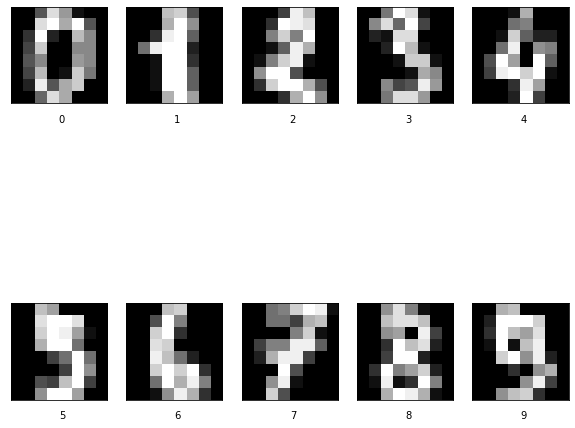

In [3]:
fig, axes = plt.subplots(2,5,figsize=(10,10),subplot_kw = {'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray', interpolation='nearest') 
    ax.text(0.5,-0.2,str(digits.target[i]),transform = ax.transAxes)

Utilizamos `train_test_split()` de sklearn para dividir el conjunto de datos en un conjunto de entrenamiento y de prueba del 80% y del 20% del conjunto de datos original respectivamente.

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_digits,y_digits,test_size=0.2,random_state=42,stratify= y_digits)
print("Tamaño de entrenamiento: ",x_train.shape,y_train.shape,"Tamaño de prueba: ",x_test.shape,y_test.shape )

Tamaño de entrenamiento:  (1437, 64) (1437,) Tamaño de prueba:  (360, 64) (360,)


Seguidamente importamos el modelo de MLP listo para clasificación de sci-kit learn. Utilizamos el parámetro de `random_state` para mantener la ejecución de este notebook consistente. Y finalmente ejecutamos `fit` para ajustar los parámetros del modelo a nuestro conjunto de datos.

In [5]:
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(x_train,y_train)

MLPClassifier(random_state=42)

Después, hacemos algunas predicciones y las compararemos a nuestro objetivo dentro del conjunto de datos. Como podemos observar el predictor no falla en ninguna de las muestras en este caso.

In [6]:
y_preds = mlp_clf.predict(x_test)
print(y_test[:20])
print(y_preds[:20])

[5 2 8 1 7 2 6 2 6 5 0 5 9 3 4 4 2 4 9 9]
[5 2 8 1 7 2 6 2 6 5 0 5 9 3 4 4 2 4 9 9]


Tenemos algunas métricas directamente del clasificador, como la precisión en entrenamiento, la precisión al predecir el conjunto de prueba y la pérdida del modelo.

In [13]:
print("Precisión en entrenamiento: ", mlp_clf.score(x_train,y_train))
print("Precisión en predicciones: ", mlp_clf.score(x_test,y_test))
print("Pérdida : ", mlp_clf.loss_)

Precisión en entrenamiento:  1.0
Precisión en predicciones:  0.9722222222222222
Pérdida :  0.0025217979804438837


Finalmente, mostramos la matriz de confusión para de manera más visual explorar la precisión del modelo en cuanto a cada caracter.

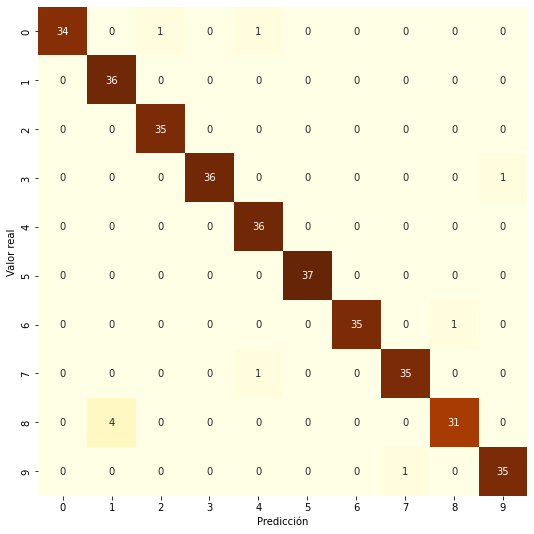

In [14]:
con_max= confusion_matrix(y_test,y_preds)
plt.figure(figsize = (9,9))
sns.heatmap(con_max,annot= True,square= True,cbar= False,cmap='YlOrBr')
plt.xlabel("Predicción")
plt.ylabel('Valor real')
plt.show()